# CIS4930 -- Final Project
## Developed by: Chloe Fandino (Team Leader), Ashley James, Madelyne Wirbel, Chloe Nolan, Christopher Enlow

## Data Preprocessing

### Imports

In [4]:
# imports here :)

# TODO: DELETE ---> any imports that don't end up getting used by the end of the project !!!!

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA


from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


from imblearn.over_sampling import SMOTE, SMOTENC

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

### Loading the data

In [5]:
df = pd.read_csv('OnlineNewsPopularity.csv') # import the data from the csv file --> convert to df

### Exploration of the dataset

In [6]:
# pd.set_option('display.max_rows', 100) # for purposes of looking at data --> need to see all rows

# basic intitial looks at the dataset
print(df.shape)

print(df.info())

(39644, 61)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords       

In [7]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [8]:
print(df.columns.tolist()) # print out all of the available columns

['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', '

In [9]:
df.isnull().sum() # null values? --> NONE :)

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [10]:
df.duplicated().sum() # duplicate values? --> NONE :)

np.int64(0)

In [11]:
# check if any infinities exist in the dataframe
numeric_df = df.select_dtypes(include=[np.number])

has_inf = np.isinf(numeric_df.to_numpy()).any()

print(has_inf) # will need to handle in cleaning
inf_cols = numeric_df.columns[np.isinf(numeric_df.to_numpy()).any(axis=0)].tolist()
print("Columns with inf:", inf_cols)

False
Columns with inf: []


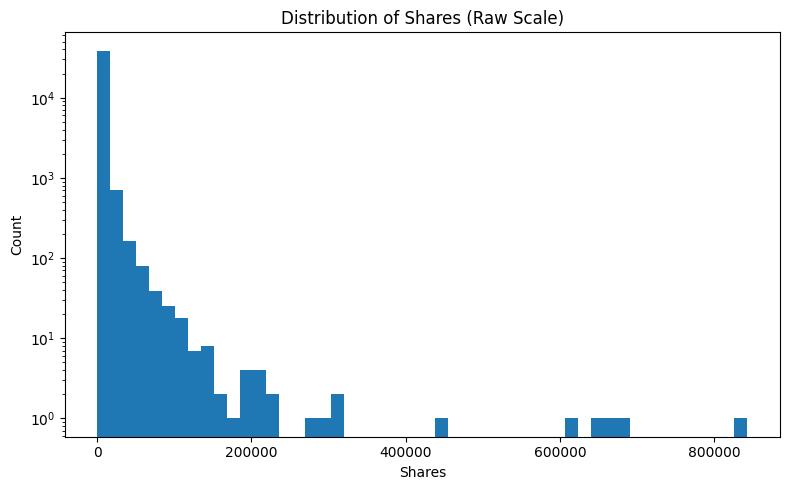

In [12]:
# histogram of shares
plt.figure(figsize=(8, 5))
plt.hist(df["shares"], bins=50)
plt.title("Distribution of Shares (Raw Scale)")
plt.xlabel("Shares")
plt.ylabel("Count")
plt.yscale("log")  # long tail
plt.tight_layout()
plt.show()

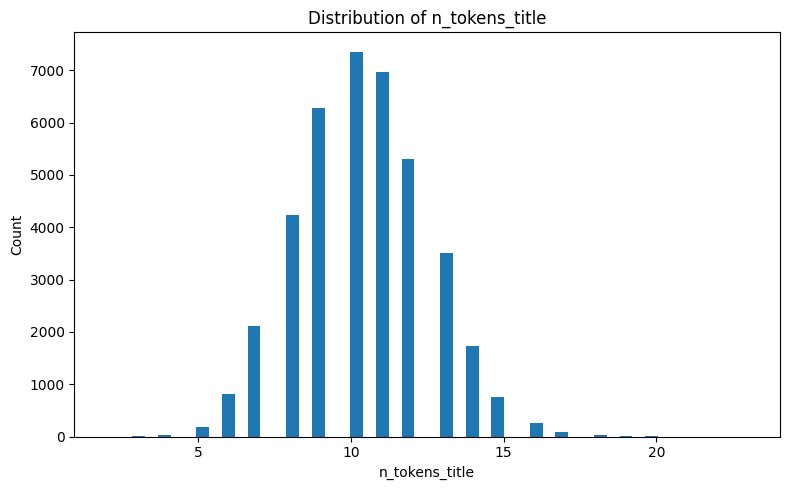

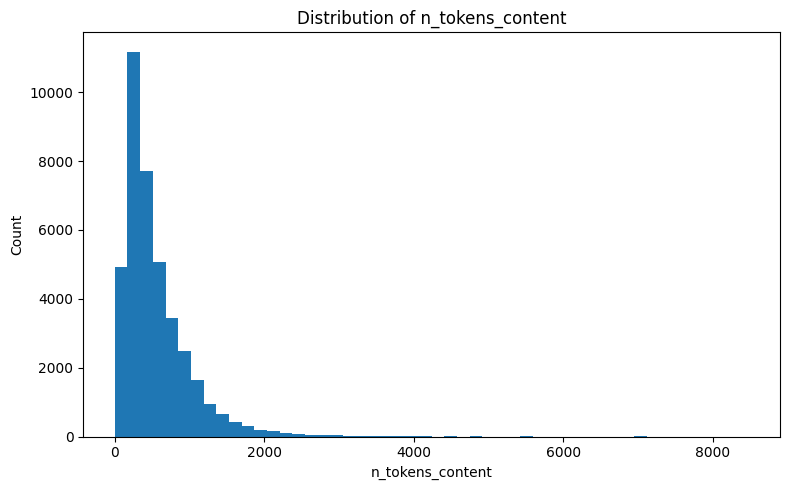

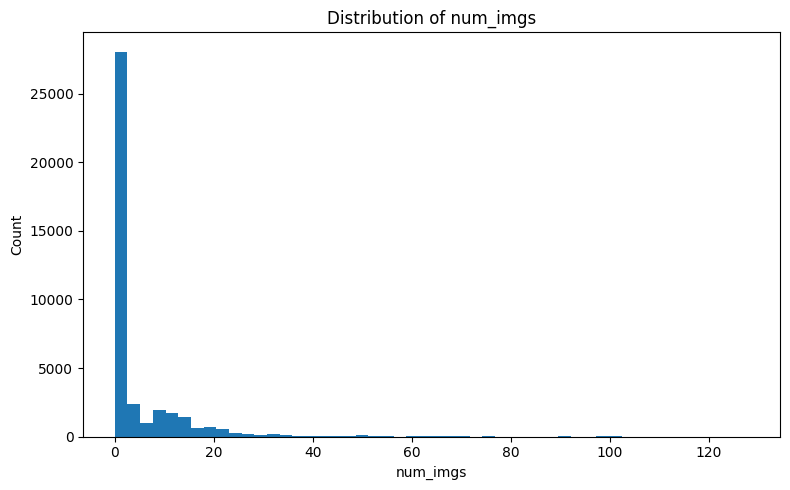

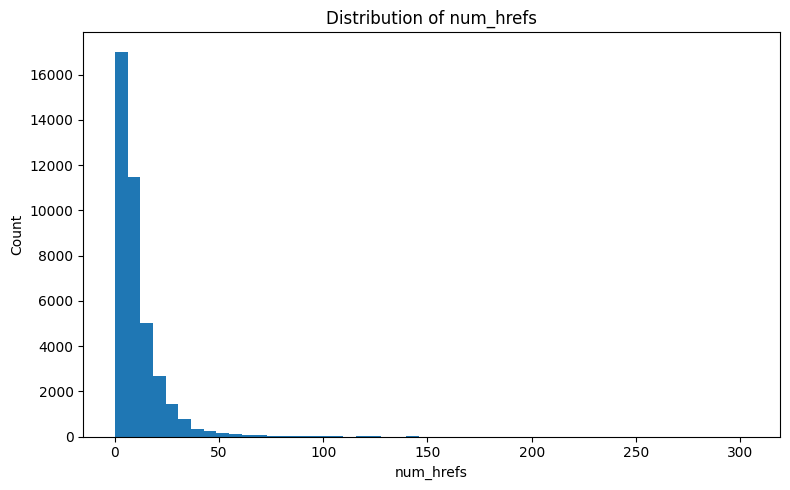

In [13]:
# distribution of key numerical features
key_cols = ["n_tokens_title", "n_tokens_content", "num_imgs", "num_hrefs"]

for col in key_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

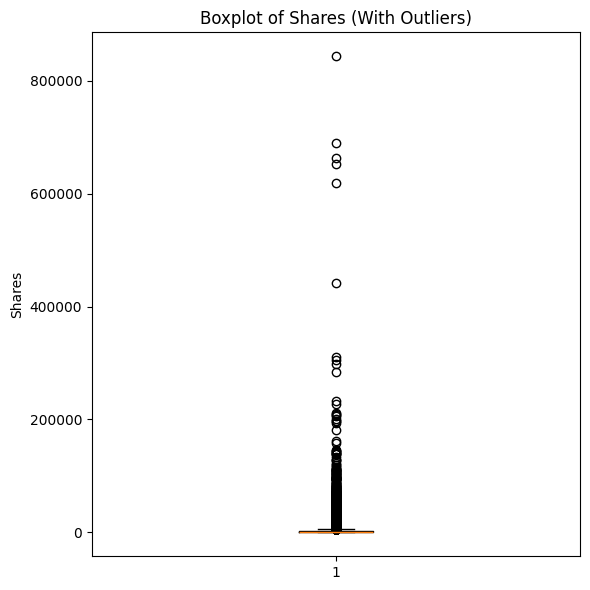

In [14]:
#boxplot of outliers
# Boxplot of raw shares
plt.figure(figsize=(6, 6))
plt.boxplot(df["shares"], vert=True)
plt.title("Boxplot of Shares (With Outliers)")
plt.ylabel("Shares")
plt.tight_layout()
plt.show()

#### Visualization of the target variable --> shares

In [ ]:
# histogram of shares
plt.figure(figsize=(8, 5))
plt.hist(df["shares"], bins=50)
plt.title("Distribution of Shares (Raw Scale)")
plt.xlabel("Shares")
plt.ylabel("Count")
plt.yscale("log")  # long tail
plt.tight_layout()
plt.show()

In [ ]:
# boxplot of raw shares --> view of the outliers
sns.boxplot(x = df["shares"])
plt.title("Boxplot of Shares (Visualization of Outliers)")
plt.ylabel("Shares")
plt.show()

#### Visualizations of numerical features

In [ ]:
# distribution of key numerical features
key_cols = ["n_tokens_title", "n_tokens_content", "num_imgs", "num_hrefs"]

for col in key_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

### Cleaning the data

In [ ]:
# # exploration of potentially non-predictive features
df = df.drop(columns=['url', 'timedelta'], errors='ignore') # url is a title and number of days since posted until added to the dataset --> no predictive qualities

# feature engineering
df['rate_positive_words'] = df['global_rate_positive_words'] / (df['n_tokens_content'] + 1)
df['rate_negative_words'] = df['global_rate_negative_words'] / (df['n_tokens_content'] + 1)
df['emotional_polarity'] = df['global_sentiment_polarity'].abs()
df['title_body_sentiment_ratio'] = df['title_sentiment_polarity'] / (df['global_sentiment_polarity'] + 0.01)

In [ ]:
# Splitting data in two --> based on median
median_shares = df['shares'].median()
print(f"Splitting data at median shares: {median_shares}")

def categorize(x):
    return 1 if x > median_shares else 0

df['y'] = df['shares'].apply(categorize)

# define X and y 
X = df.drop(columns=['shares', 'y'])
y = df['y']

binary_cols = [col for col in X.columns if "data_channel" in col or "weekday" in col or "is_weekend" in col]
# ensure binary cols are actually integers
for col in binary_cols:
    X[col] = X[col].astype(int)

numeric_cols = [col for col in X.columns if col not in binary_cols]

In [ ]:
# --> test-train-split <-- DO NOT EDIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#CHLOE pearson correlation coefficient
corr_matrix = X_train[numeric_cols].corr(method='pearson').abs()

# visualization of highly correlated features
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=False,
    linewidths=0.3,
    cbar_kws={"shrink": 0.8},
    square=True
)
plt.title("Pearson Correlation Heatmap of Numeric Features (absolute value)")
plt.show()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(f"Dropping {len(to_drop)} columns due to correlation: {to_drop}")

X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)
numeric_cols = [c for c in numeric_cols if c not in to_drop]

#### Anomaly Detection

In [ ]:
# function to visualize and count anomalies
def anomaly_detection(feature, visualize):
    # first boxplot to see potential outliers
    if visualize:
        sns.boxplot(x = df[feature], color = 'purple')
        plt.title(feature)
        plt.show()

    # second calculate outliers based on IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    anomalies = df[(df[feature] < lower) | (df[feature] > upper)]
    print('Anomalies: \n', anomalies) # prints a list of potential anomalies

    num_anomalies = anomalies.shape[0]
    return num_anomalies

In [ ]:
# BEFORE OUTLIER HANDLING --> visualize outliers
cols_remaining = df.columns.tolist() # what columns are left in the dataset

num_anomalies_1 = []

# for each of the remaining columns print the anomalies and see if there needs to be any adjustments made --> generally high rates of anomalies
for col in cols_remaining:
    num = anomaly_detection(col, True)
    num_anomalies_1.append(num)

#### Scaling

In [ ]:
#CHLOE handling skew and outliers
scaler = RobustScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

#### Smote

In [ ]:
#CHLOE TRAIN SMOTE NAN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

#CLASS BALANCING (SMOTE)
cat_indices = [X_train.columns.get_loc(c) for c in binary_cols if c in X_train.columns]
sm = SMOTENC(categorical_features=cat_indices, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#### Feature selection

In [ ]:
#CHLOE FEATURE SELECTION
cat_indices = [X_train.columns.get_loc(c) for c in binary_cols if c in X_train.columns]
selector_model = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)
selector_model.fit(X_train_res, y_train_res)

selection = SelectFromModel(selector_model, threshold="1.25*median", prefit=True)
X_train_selected = selection.transform(X_train_res)
X_test_selected = selection.transform(X_test)

selected_features_names = X_train_res.columns[selection.get_support()]
print(f"Selected {len(selected_features_names)} features.")

## Training and Testing

In [ ]:
# only need to declare the variable once
labels = ['Not Viral', 'Viral']

#### 1. Logistic Regression Model

In [ ]:
# implement a logistic regression model --> basic model for classification
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_predict_log = log_model.predict(X_test)

In [ ]:
# evaluate linear regression performance
print("Classification Report:\n")
print(classification_report(y_test, y_predict_log, target_names = labels))

cm = confusion_matrix(y_test, y_predict_log)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Purples', xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### 2. KNN

In [ ]:
# find the optimal value of k
k_values = range(1, 40)
accuracy_scores = []

for k in k_values:
    # Build KNN classifier for each k
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    knn.fit(X_train, y_train.ravel())
    
    # Predict on test set
    pred = knn.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test.ravel(), pred)
    accuracy_scores.append(acc)

plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='green')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Finding Optimal K for Binary Classification")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K found: {best_k} with Accuracy: {max(accuracy_scores):.4f}")

In [ ]:
# train knn with optimal k
knn_best = KNeighborsClassifier(n_neighbors=best_k, weights='uniform')

# Fit the model
knn_best.fit(X_train, y_train.values.ravel()) 

# Prediction
y_pred_knn = knn_best.predict(X_test)

# visualize success of knn
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

# Evaluation
print(f"--- FINAL KNN RESULTS (K={best_k}) ---")
print("Classification Report:\n")
print(classification_report(y_test.values.ravel(), y_pred_knn, target_names=labels))

In [ ]:
# Subsample to prevent kernel crash
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_vis = X_train.sample(3000, random_state=42)  
y_vis = y_train.loc[X_vis.index]

# PCA on smaller data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_vis)
X_test_pca = pca.transform(X_test)

# Train KNN on subsample
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_pca, y_vis.values.ravel())

h = 1
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFCCCC', '#CCCCFF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)
plt.scatter(
    X_test_pca[:, 0],
    X_test_pca[:, 1],
    c=y_test.values.ravel(),
    cmap=cmap_bold,
    edgecolor='k',
    s=30,
    alpha=0.7
)

#### 3. Random Forest Classifier

In [ ]:
#CHLOE RANDOM FOREST

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20, 
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

rf_model.fit(X_train_res, y_train_res)

y_predict_rf = rf_model.predict(X_test)

#evaluation
print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_predict_rf, target_names=labels))

cm = confusion_matrix(y_test, y_predict_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()
#feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(15)

In [ ]:
# Get feature importance from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame to organize them
# Assuming X_train was a DataFrame originally. If it was a numpy array, 
# we generate generic names Feature_0, Feature_1, etc.
try:
    feature_names = X_train.columns
except:
    feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Top 20 Features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(20), palette='viridis')
plt.title("Top 20 Features driving the Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

print("Top 5 Most Important Features:")
print(feature_imp_df.head(5))

#### 4. XGBoost

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    objective='binary:logistic'
)

xgb_model.fit(X_train_selected, y_train_res)

y_pred_xgb = xgb_model.predict(X_test_selected)

# evaluate
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb, target_names=labels))

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Binary Confusion Matrix")
plt.show()

#### 5. Stacking

In [ ]:
# TODO: something here plz

#### 6. Support Vector Machine

In [ ]:
# TODO: we still need this pls do this

#### 7. Neural Network

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test_tensor  = torch.tensor(y_test.to_numpy(), dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# TODO: investigate the architecture of the NN --> increase the complexity to better learn the pattern of the data
class ClassificationNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 51),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(51, 26), # hidden layer
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(26, num_classes)  # output layer
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
model = ClassificationNN(input_dim=X_train_tensor.shape[1], num_classes=3)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

In [ ]:
train_losses = []
test_losses = []

n_epochs = 20
for epoch in range(n_epochs):
    model.train()
    running_train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item() * X_batch.size(0)

    train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Test loss
    model.eval()
    running_test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_test_loss += loss.item() * X_batch.size(0)

    test_loss = running_test_loss / len(test_loader.dataset)
    test_losses.append(test_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{n_epochs} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

#evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    y_pred = torch.argmax(outputs, dim=1)

print("Classification Report:\n")
print(classification_report(y_test_tensor.numpy(), y_pred.numpy(), target_names=labels))

cm = confusion_matrix(y_test_tensor.numpy(), y_pred.numpy())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training vs Test Loss")
plt.legend()
plt.grid(True)
plt.show()